In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
from scipy.stats import norm
import pylab

In [2]:
data = pd.read_csv('./final_ds.csv')
data.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,"""Weird Al"" Yankovic",0.176934,0.664788,218165.2576,-9.877909,0.162139,-9.877909,0.082392,33.681818,9.0,33.681818,9,1,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
1,1,$pyda,0.000122,0.514000,331240.0000,-5.115000,0.367000,-5.115000,0.060200,58.000000,7.0,58.000000,7,1,1,['others']
2,2,'Be More Chill' Ensemble,0.764000,0.497000,164400.0000,-7.279000,0.453000,-7.279000,0.044000,52.000000,3.0,52.000000,3,1,1,['others']
3,3,'In The Heights' Original Broadway Company,0.636588,0.541000,301908.2941,-9.405882,0.193824,-9.405882,0.150006,46.588235,7.0,46.588235,7,1,17,"['broadway', 'show tunes']"
4,4,'Little Women' Original Broadway Cast,0.902000,0.345000,275360.0000,-7.955000,0.072100,-7.955000,0.035400,42.000000,1.0,42.000000,1,1,2,['others']


In [3]:
data=data.iloc[:,2:-1]
data.head()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,0.176934,0.664788,218165.2576,-9.877909,0.162139,-9.877909,0.082392,33.681818,9.0,33.681818,9,1,132
1,0.000122,0.514000,331240.0000,-5.115000,0.367000,-5.115000,0.060200,58.000000,7.0,58.000000,7,1,1
2,0.764000,0.497000,164400.0000,-7.279000,0.453000,-7.279000,0.044000,52.000000,3.0,52.000000,3,1,1
3,0.636588,0.541000,301908.2941,-9.405882,0.193824,-9.405882,0.150006,46.588235,7.0,46.588235,7,1,17
4,0.902000,0.345000,275360.0000,-7.955000,0.072100,-7.955000,0.035400,42.000000,1.0,42.000000,1,1,2


#### Computing mean for each column

In [4]:
data.mean(axis=0)

acousticness         0.431509
danceability         0.542595
duration_ms     235149.927895
energy             -10.749018
liveness             0.189526
loudness           -10.749018
speechiness          0.057234
tempo               40.556002
valence              5.422444
popularity          40.556002
key                  5.422444
mode                 0.779178
count               16.831291
dtype: float64

#### Computing variance for each column

In [5]:
data.var(axis=0)

acousticness    1.195774e-01
danceability    2.837281e-02
duration_ms     5.812268e+09
energy          3.416535e+01
liveness        1.599953e-02
loudness        3.416535e+01
speechiness     8.192908e-04
tempo           3.131414e+02
valence         1.211899e+01
popularity      3.131414e+02
key             1.211899e+01
mode            1.720695e-01
count           3.378881e+03
dtype: float64

In [6]:
data.describe()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000
mean,0.431509,0.542595,235149.927895,-10.749018,0.189526,-10.749018,0.057234,40.556002,5.422444,40.556002,5.422444,0.779178,16.831291
std,0.345800,0.168442,76238.233780,5.845113,0.126489,5.845113,0.028623,17.695802,3.481234,17.695802,3.481234,0.414813,58.128141
min,0.000001,-0.186752,27867.000000,-60.000000,0.011600,-60.000000,0.000000,0.003802,0.000000,0.003802,0.000000,0.000000,1.000000
25%,0.099200,0.439000,186553.750000,-13.295300,0.109000,-13.295300,0.037200,31.111111,2.000000,31.111111,2.000000,1.000000,2.000000
50%,0.364985,0.555000,223393.252950,-9.515702,0.155450,-9.515702,0.047000,43.000000,6.000000,43.000000,6.000000,1.000000,4.000000
75%,0.769000,0.663000,268618.300000,-6.561000,0.227172,-6.561000,0.068100,53.000000,8.000000,53.000000,8.000000,1.000000,11.000000
max,0.996000,0.975000,600000.000000,1.342000,0.991000,1.342000,0.154608,95.000000,11.000000,95.000000,11.000000,1.000000,3172.000000


## BEFORE NORMALISATION

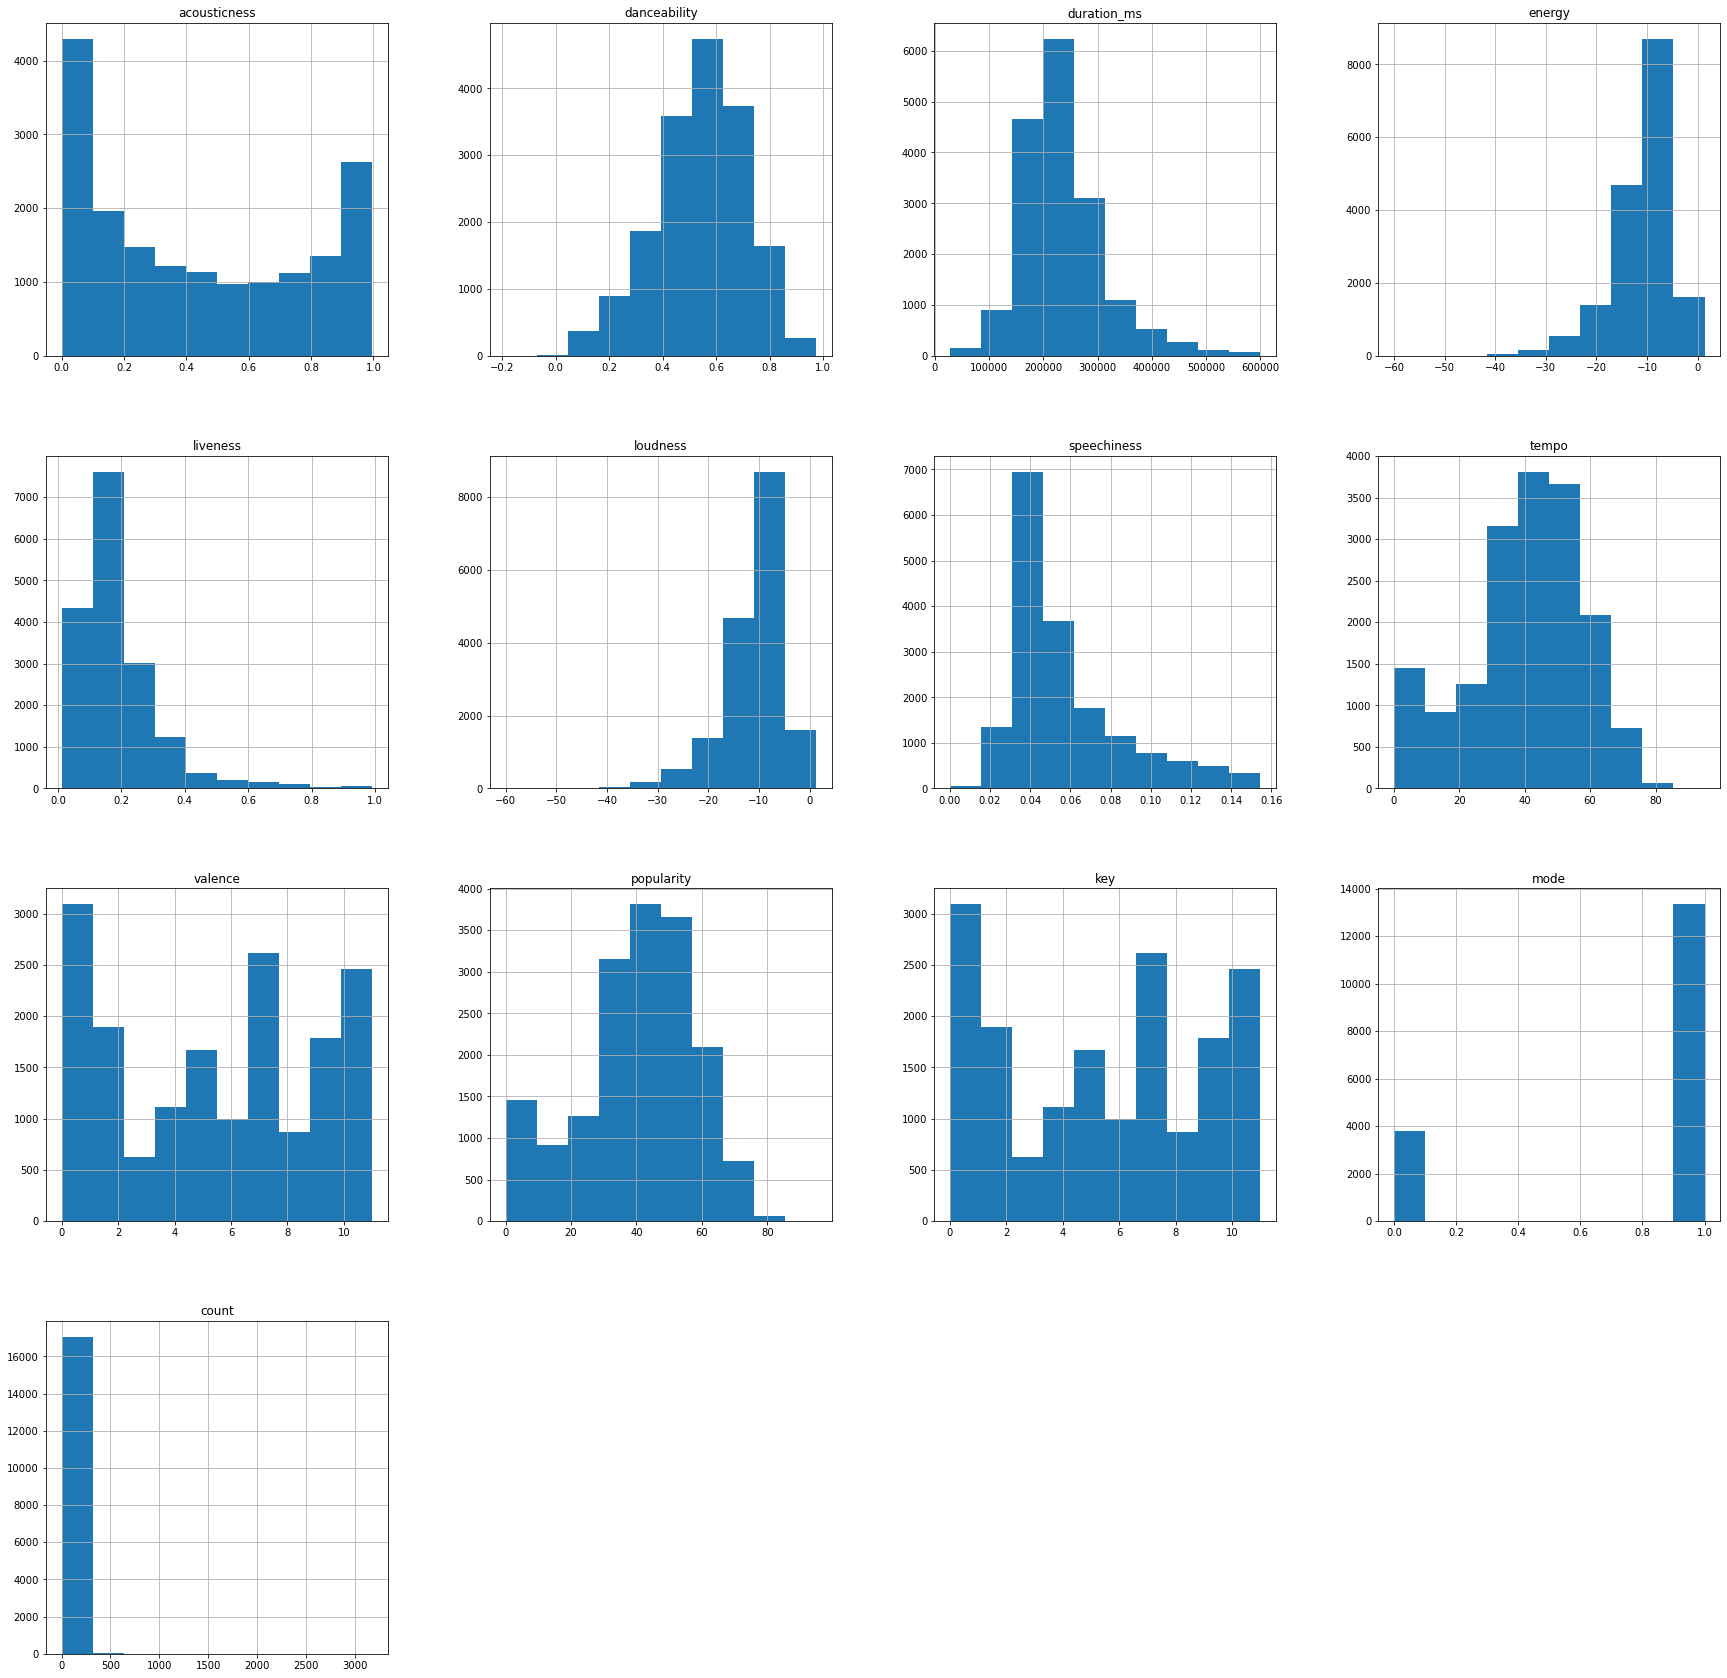

In [7]:
data.hist(figsize=(30,30))
plt.show()

## Standardization
It is much less affected by outliers.
#### StandardScaler
 
 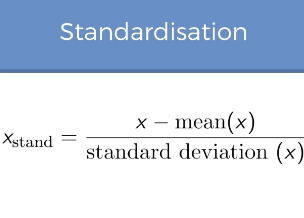

Standardize generally means changing the values so that the distribution is centered around 0, with a standard deviation of 1.


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
data_sc= pd.DataFrame(data_sc)
data_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.736213,0.725450,-0.222791,0.149036,-0.216518,0.149036,0.878972,-0.388475,1.027699,-0.388475,1.027699,0.532356,1.981348
1,-1.247542,-0.169766,1.260429,0.963913,1.403118,0.963913,0.103621,0.985799,0.453173,0.985799,0.453173,0.532356,-0.272360
2,0.961542,-0.270694,-0.928038,0.593679,2.083038,0.593679,-0.462369,0.646726,-0.695878,0.646726,-0.695878,0.532356,-0.272360
3,0.593076,-0.009469,0.875680,0.229794,0.033978,0.229794,3.241227,0.340895,0.453173,0.340895,0.453173,0.532356,0.002902
4,1.360628,-1.173106,0.527442,0.478023,-0.928373,0.478023,-0.762832,0.081604,-1.270404,0.081604,-1.270404,0.532356,-0.255156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,1.554388,-1.078116,-0.615325,-1.169555,-0.091124,-1.169555,-0.514775,-2.178886,-0.408615,-2.178886,-0.408615,0.532356,-0.255156
17132,1.592947,-0.274652,-0.697469,-1.223619,-0.471404,-1.223619,2.811289,-1.971674,-0.121352,-1.971674,-0.121352,0.532356,-0.186340
17133,1.250735,0.507043,-1.136693,-1.209076,-0.605016,-1.209076,0.096634,0.025091,1.602224,0.025091,1.602224,0.532356,-0.255156
17134,1.583307,-1.790547,-1.173145,-2.635951,-0.814526,-2.635951,-0.294668,1.098824,-0.983141,1.098824,-0.983141,-1.878441,-0.255156


In [9]:
print(data_sc.describe())

                 0             1             2             3             4   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -2.073246e-17 -7.517589e-16 -8.832026e-17  7.878333e-18  2.313742e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.247891e+00 -4.330076e+00 -2.718964e+00 -8.426255e+00 -1.406689e+00   
25%   -9.610147e-01 -6.150356e-01 -6.374439e-01 -4.356385e-01 -6.366405e-01   
50%   -1.923825e-01  7.364763e-02 -1.542142e-01  2.110057e-01 -2.694049e-01   
75%    9.760015e-01  7.148355e-01  4.390100e-01  7.165199e-01  2.976362e-01   
max    1.632470e+00  2.567156e+00  4.785797e+00  2.068629e+00  6.336488e+00   

                 5             6             7             8             9   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean   7.878333e-18 -5.805088e-17  3.217677e-16  1.210775e-16  3.217677e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.

After standardization the distribution  now is centered at mean and has a standard deviation of 1.

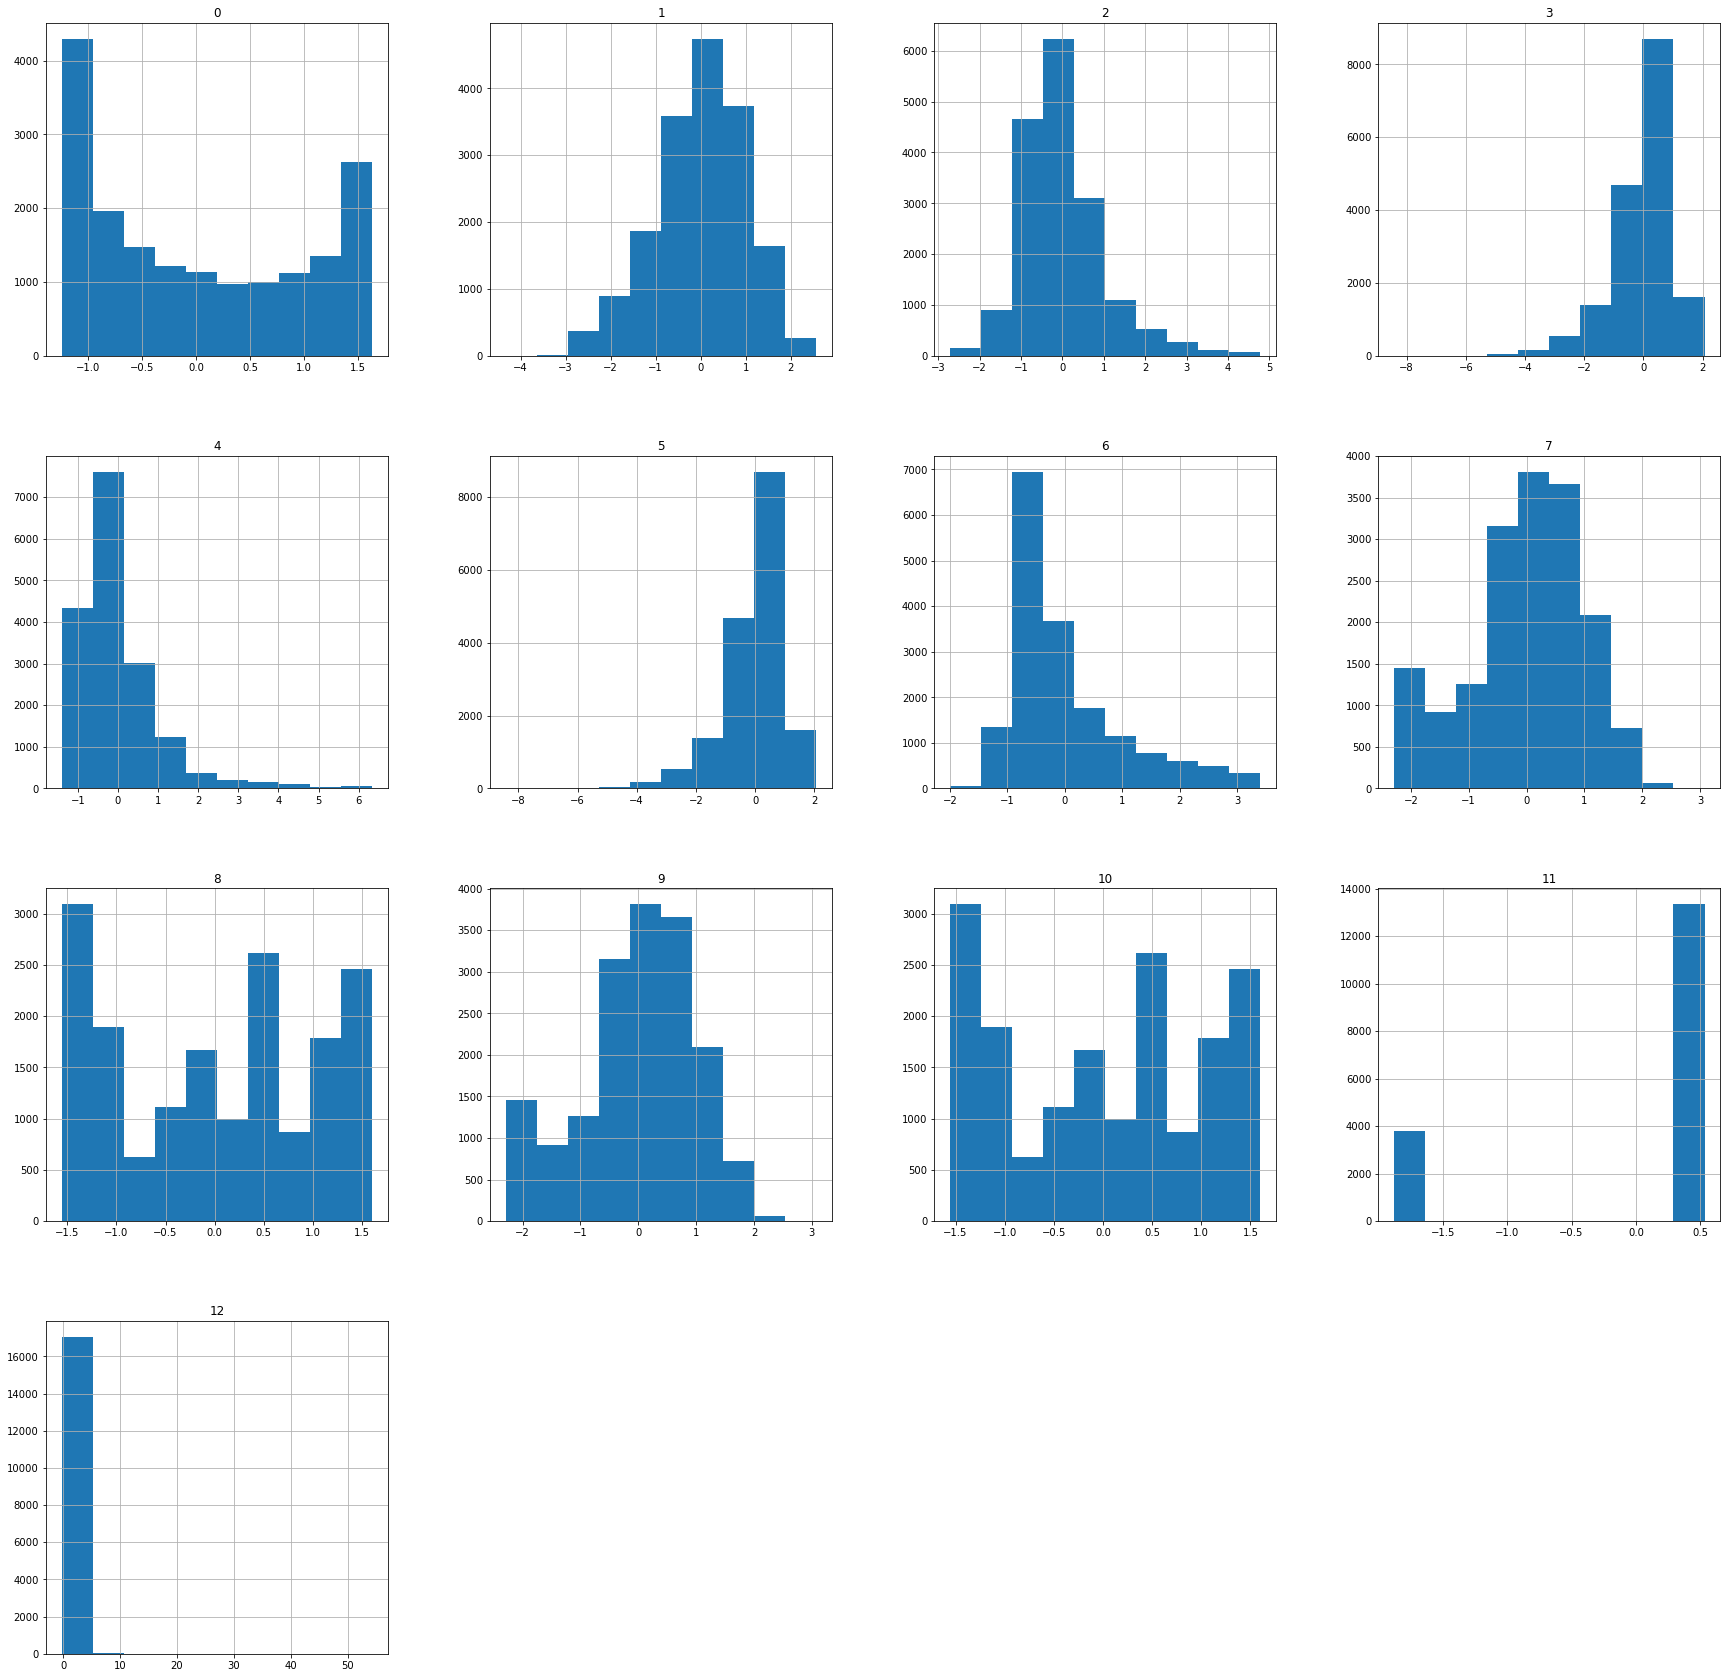

In [10]:
data_sc.hist(figsize=(30,30))
plt.show()

## Normalization
 Normalization is useful when there are no outliers as it cannot cope up with them.
#### MinMaxScaler

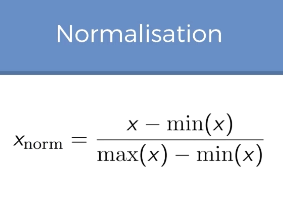
MinMaxScaler subtracts the minimum value in the feature and then divides by the range(the difference between the original maximum and original minimum). It rescales the data set such that all feature values are in the range [0, 1]

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data_mm=sc.fit_transform(data)
data_mm= pd.DataFrame(data_mm)
data_mm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.736213,0.725450,-0.222791,0.149036,-0.216518,0.149036,0.878972,-0.388475,1.027699,-0.388475,1.027699,0.532356,1.981348
1,-1.247542,-0.169766,1.260429,0.963913,1.403118,0.963913,0.103621,0.985799,0.453173,0.985799,0.453173,0.532356,-0.272360
2,0.961542,-0.270694,-0.928038,0.593679,2.083038,0.593679,-0.462369,0.646726,-0.695878,0.646726,-0.695878,0.532356,-0.272360
3,0.593076,-0.009469,0.875680,0.229794,0.033978,0.229794,3.241227,0.340895,0.453173,0.340895,0.453173,0.532356,0.002902
4,1.360628,-1.173106,0.527442,0.478023,-0.928373,0.478023,-0.762832,0.081604,-1.270404,0.081604,-1.270404,0.532356,-0.255156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,1.554388,-1.078116,-0.615325,-1.169555,-0.091124,-1.169555,-0.514775,-2.178886,-0.408615,-2.178886,-0.408615,0.532356,-0.255156
17132,1.592947,-0.274652,-0.697469,-1.223619,-0.471404,-1.223619,2.811289,-1.971674,-0.121352,-1.971674,-0.121352,0.532356,-0.186340
17133,1.250735,0.507043,-1.136693,-1.209076,-0.605016,-1.209076,0.096634,0.025091,1.602224,0.025091,1.602224,0.532356,-0.255156
17134,1.583307,-1.790547,-1.173145,-2.635951,-0.814526,-2.635951,-0.294668,1.098824,-0.983141,1.098824,-0.983141,-1.878441,-0.255156


In [12]:
print(data_mm.describe())

                 0             1             2             3             4   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -2.073246e-17 -7.517589e-16 -8.832026e-17  7.878333e-18  2.313742e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.247891e+00 -4.330076e+00 -2.718964e+00 -8.426255e+00 -1.406689e+00   
25%   -9.610147e-01 -6.150356e-01 -6.374439e-01 -4.356385e-01 -6.366405e-01   
50%   -1.923825e-01  7.364763e-02 -1.542142e-01  2.110057e-01 -2.694049e-01   
75%    9.760015e-01  7.148355e-01  4.390100e-01  7.165199e-01  2.976362e-01   
max    1.632470e+00  2.567156e+00  4.785797e+00  2.068629e+00  6.336488e+00   

                 5             6             7             8             9   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean   7.878333e-18 -5.805088e-17  3.217677e-16  1.210775e-16  3.217677e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.

After normalization all the values have minimum value 0 and maximum value 1

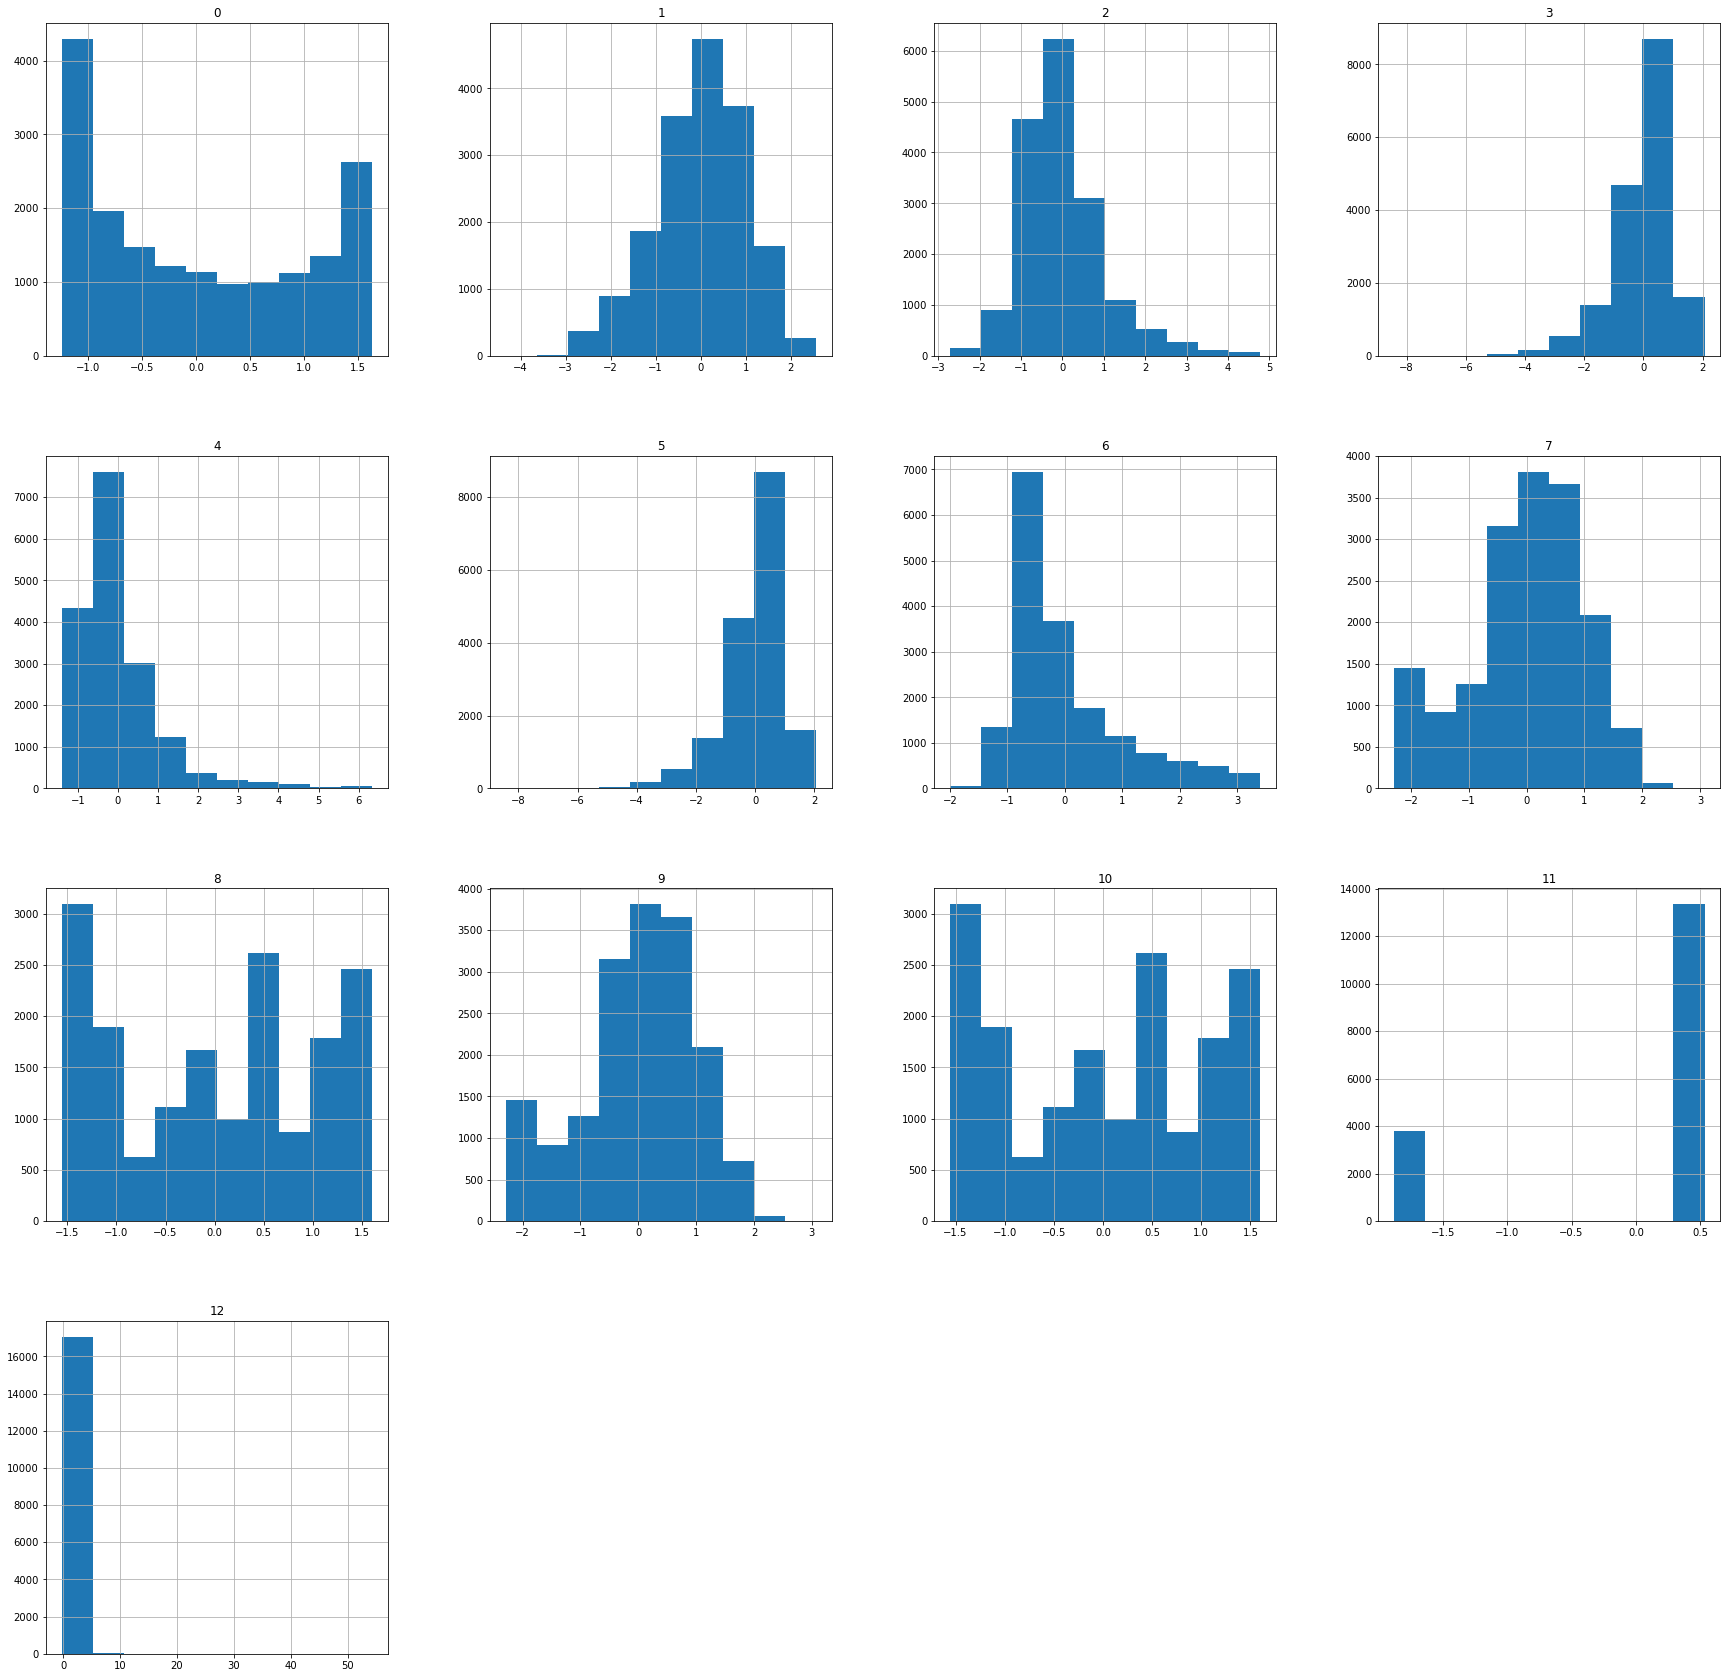

In [13]:
data_mm.hist(figsize=(30,30))
plt.show()

## NEED OF NORMALIZATION

Normalizing a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

For example,in this data set,consider two features- acousticness and tempo. Where acousticness ranges from 0–0.99, while tempo ranges from 0–200 and higher. The range of tempo is  larger than acousticness. As these two features are in very different ranges when we do further analysis like multivariate linear regression, for example, the  tempo will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model.To conclude data normalization transforms multiscaled data to the same scale

## GRAPHS TO CHECK IF THE DATA IS NORMAL 

Using histogram

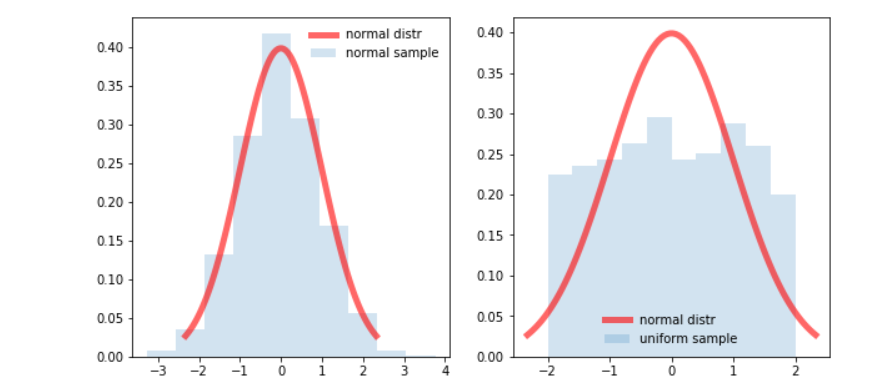

                           Data follows normal distribution                  Data do not follow normal distribution

In [14]:
print(data_mm.describe())

                 0             1             2             3             4   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -2.073246e-17 -7.517589e-16 -8.832026e-17  7.878333e-18  2.313742e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.247891e+00 -4.330076e+00 -2.718964e+00 -8.426255e+00 -1.406689e+00   
25%   -9.610147e-01 -6.150356e-01 -6.374439e-01 -4.356385e-01 -6.366405e-01   
50%   -1.923825e-01  7.364763e-02 -1.542142e-01  2.110057e-01 -2.694049e-01   
75%    9.760015e-01  7.148355e-01  4.390100e-01  7.165199e-01  2.976362e-01   
max    1.632470e+00  2.567156e+00  4.785797e+00  2.068629e+00  6.336488e+00   

                 5             6             7             8             9   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean   7.878333e-18 -5.805088e-17  3.217677e-16  1.210775e-16  3.217677e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.

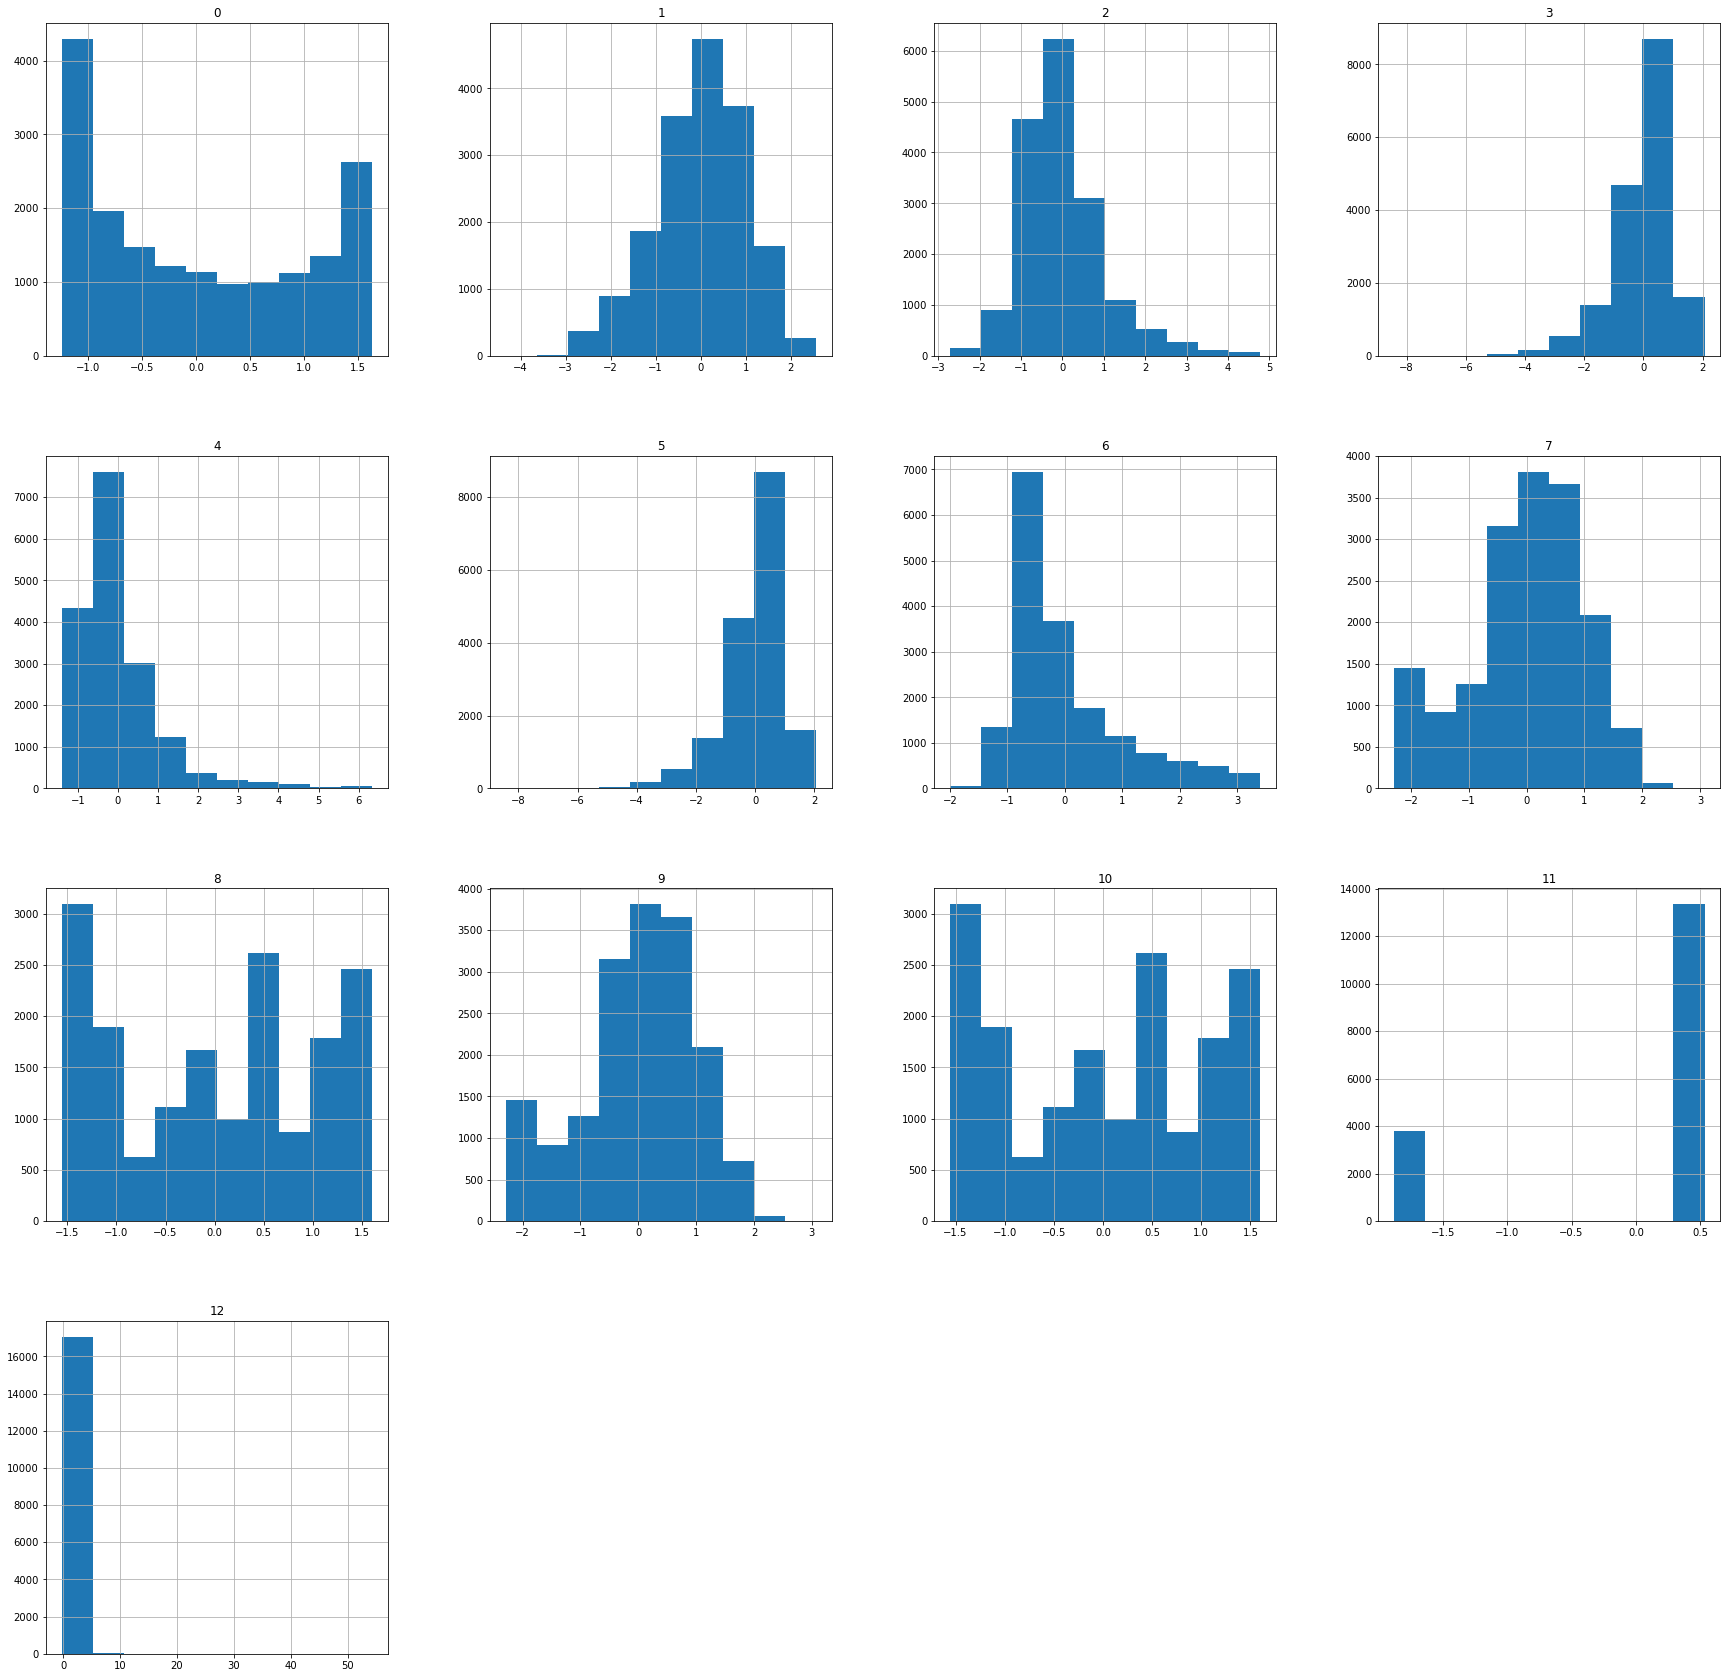

In [15]:
data_mm.hist(figsize=(30,30))
plt.show()

#### Using qqplots

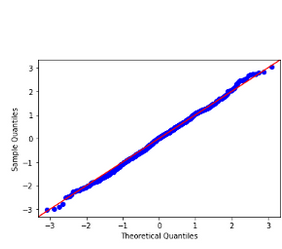

                                                  qqplot for perfectly Normal distribution

BEFORE NORMALIZATION

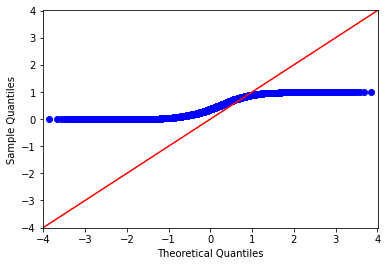

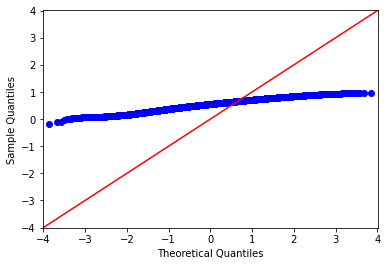

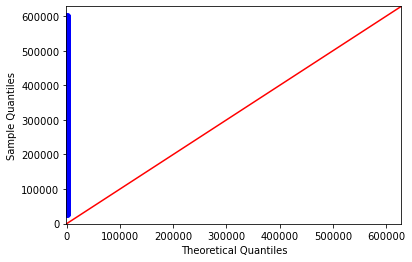

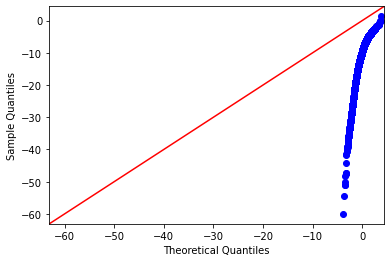

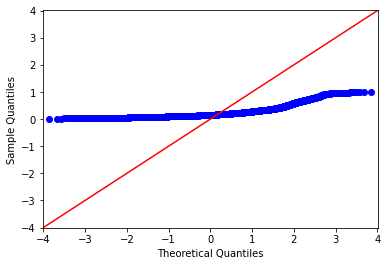

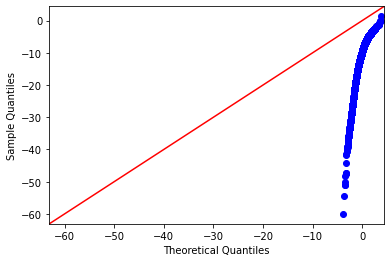

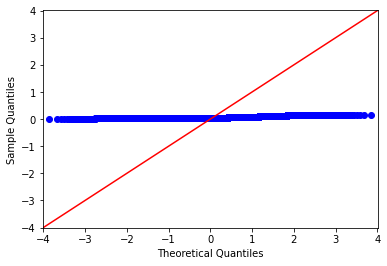

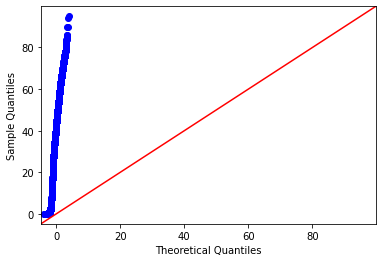

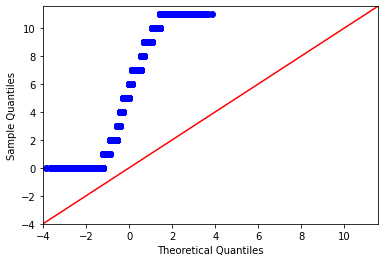

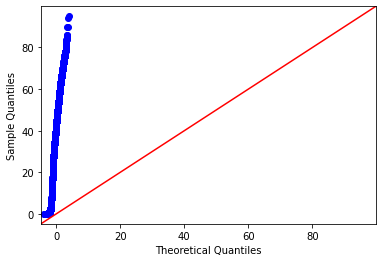

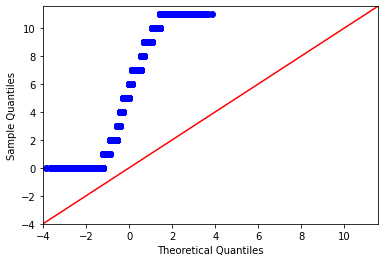

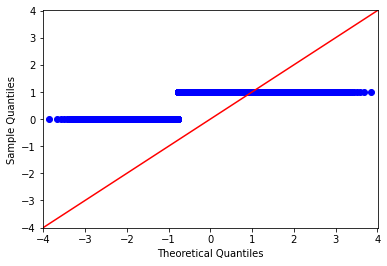

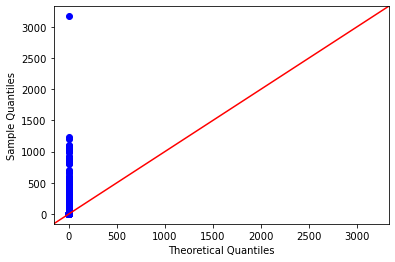

In [16]:
for i in data:
    sm.qqplot(data[i], line='45')
    pylab.show()

AFTER NORMALIZATION

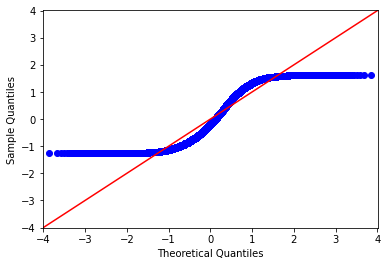

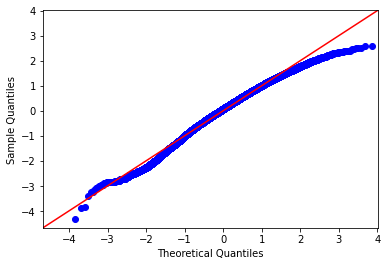

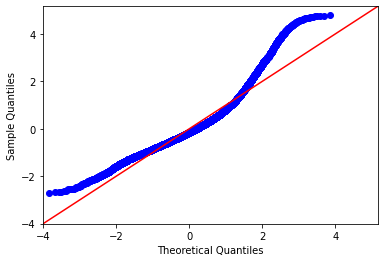

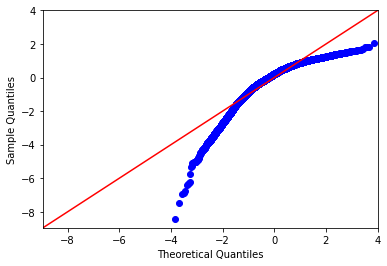

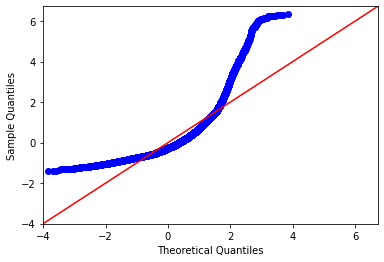

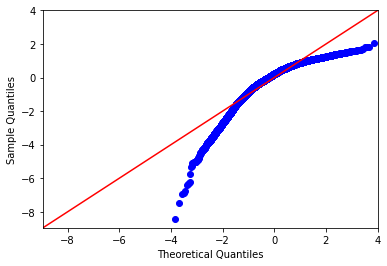

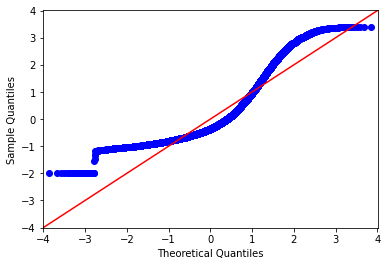

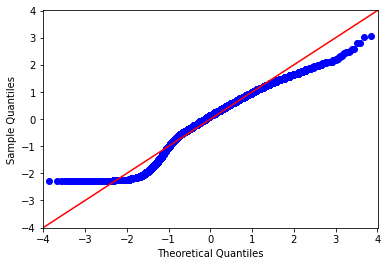

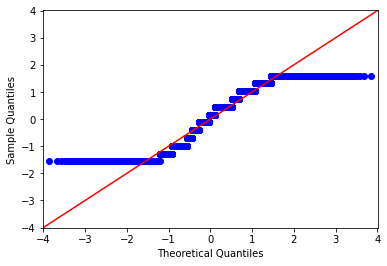

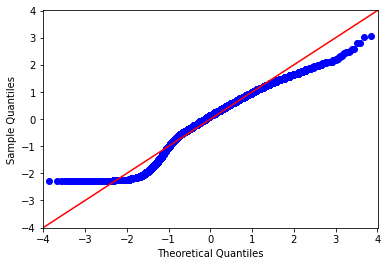

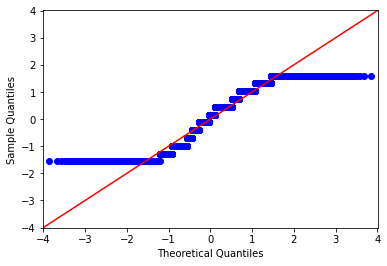

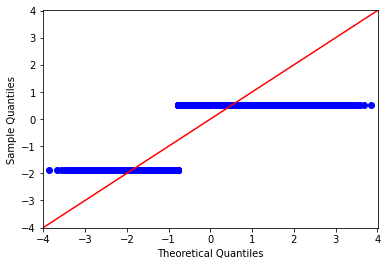

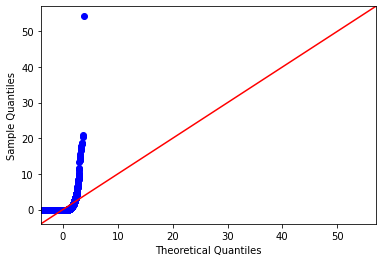

In [17]:
for i in data_mm:
    sm.qqplot(data_mm[i], line='45')
    pylab.show()
